<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Roll No - 130</b></center>
    <center><b><h1>Enrollment No - 24010101694</b></center>
<center><b><h1>Lab - 6</b></center>    
    <center><b><h1>Karan Sonagara</b></center>  
<pre>


## 🔍 What is Data Reduction?

Data reduction refers to the process of reducing the amount of data that needs to be processed and stored, while preserving the essential patterns in the data.

### Why do we reduce data?
- To reduce computational cost.
- To remove noise and redundant features.
- To improve model performance and training time.
- To visualize high-dimensional data in 2D or 3D.

Common data reduction techniques include:
- Principal Component Analysis (PCA)
- Feature selection
- Sampling



## 📉 What is Principal Component Analysis (PCA)?

PCA is a **dimensionality reduction technique** that transforms a dataset into a new coordinate system. It identifies the **directions (principal components)** where the variance of the data is maximized.

### Key Concepts:
- **Principal Components**: New features (linear combinations of original features) capturing most variance.
- **Eigenvectors & Eigenvalues**: Used to compute these principal directions.
- **Covariance Matrix**: Measures how features vary with each other.

PCA helps in **visualizing high-dimensional data**, **noise reduction**, and **speeding up algorithms**.



## 🧠 NumPy Functions Summary for PCA

| Function | Purpose |
|---------|---------|
| `np.mean(X, axis=0)` | Compute mean of each column (feature-wise mean). |
| `X - np.mean(X, axis=0)` | Centering the data (zero mean). |
| `np.cov(X, rowvar=False)` | Compute covariance matrix for features. |
| `np.linalg.eigh(cov_mat)` | Get eigenvalues and eigenvectors (for symmetric matrices). |
| `np.argsort(values)[::-1]` | Sort values in descending order. |
| `np.dot(X, eigenvectors)` | Project original data onto new axes. |


# Step 1: Load the Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
iris=pd.read_csv("iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
x=iris.drop(columns="species")
y=iris["species"].map({
    'setosa':0,
    'versicolor':1,
    'virginica':2
})
print(x.shape)

(150, 4)


In [24]:
arrcov = [40,80,45,65,10,55]
print(np.cov(arrcov,rowvar=False))

574.1666666666667


# Step 2: Standardize the data (zero mean)

In [13]:
x_meaned= x-np.mean(x,axis=0)
print(x_meaned)
x_meaned.shape

     sepal_length  sepal_width  petal_length  petal_width
0       -0.743333     0.442667        -2.358    -0.999333
1       -0.943333    -0.057333        -2.358    -0.999333
2       -1.143333     0.142667        -2.458    -0.999333
3       -1.243333     0.042667        -2.258    -0.999333
4       -0.843333     0.542667        -2.358    -0.999333
..            ...          ...           ...          ...
145      0.856667    -0.057333         1.442     1.100667
146      0.456667    -0.557333         1.242     0.700667
147      0.656667    -0.057333         1.442     0.800667
148      0.356667     0.342667         1.642     1.100667
149      0.056667    -0.057333         1.342     0.600667

[150 rows x 4 columns]


(150, 4)

# Step 3: Compute the Covariance Matrix

In [15]:
cov_mat=np.cov(x_meaned, rowvar=False)
print('Coveriance Matrix',cov_mat)
print('Coveriance Matrix',cov_mat.shape)

Coveriance Matrix [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
Coveriance Matrix (4, 4)


# Step 4: Compute eigenvalues and eigenvectors

In [19]:
np.linalg.eigh(cov_mat)

EighResult(eigenvalues=array([0.02383509, 0.0782095 , 0.24267075, 4.22824171]), eigenvectors=array([[ 0.31548719,  0.58202985,  0.65658877, -0.36138659],
       [-0.3197231 , -0.59791083,  0.73016143,  0.08452251],
       [-0.47983899, -0.07623608, -0.17337266, -0.85667061],
       [ 0.75365743, -0.54583143, -0.07548102, -0.3582892 ]]))

# Step 5: Compute eigenvalues and eigenvectors

In [21]:
eigen_values,eigen_vector=np.linalg.eigh(cov_mat)
print("eigenvalues:\n",eigen_values)
print("eigenvectors:\n",eigen_vector)

eigenvalues:
 [0.02383509 0.0782095  0.24267075 4.22824171]
eigenvectors:
 [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


# Step 6: Select the top k eigenvectors (top 2)

In [23]:
sorted_ind=np.argsort(eigen_values)[::-1]
sorted_eigenvalues=eigen_values[sorted_ind]
sorted_eigenvectors=eigen_vector[:,sorted_ind]
k=2
vector_subset=sorted_eigenvectors[:,0:k]
vector_subset.shape

(4, 2)

# Step 7: Project the data onto the top k eigenvectors

In [25]:
X_reduced=np.dot(x_meaned, vector_subset)
print(X_reduced)
k.shape

[[ 2.68412563  0.31939725]
 [ 2.71414169 -0.17700123]
 [ 2.88899057 -0.14494943]
 [ 2.74534286 -0.31829898]
 [ 2.72871654  0.32675451]
 [ 2.28085963  0.74133045]
 [ 2.82053775 -0.08946138]
 [ 2.62614497  0.16338496]
 [ 2.88638273 -0.57831175]
 [ 2.6727558  -0.11377425]
 [ 2.50694709  0.6450689 ]
 [ 2.61275523  0.01472994]
 [ 2.78610927 -0.235112  ]
 [ 3.22380374 -0.51139459]
 [ 2.64475039  1.17876464]
 [ 2.38603903  1.33806233]
 [ 2.62352788  0.81067951]
 [ 2.64829671  0.31184914]
 [ 2.19982032  0.87283904]
 [ 2.5879864   0.51356031]
 [ 2.31025622  0.39134594]
 [ 2.54370523  0.43299606]
 [ 3.21593942  0.13346807]
 [ 2.30273318  0.09870885]
 [ 2.35575405 -0.03728186]
 [ 2.50666891 -0.14601688]
 [ 2.46882007  0.13095149]
 [ 2.56231991  0.36771886]
 [ 2.63953472  0.31203998]
 [ 2.63198939 -0.19696122]
 [ 2.58739848 -0.20431849]
 [ 2.4099325   0.41092426]
 [ 2.64886233  0.81336382]
 [ 2.59873675  1.09314576]
 [ 2.63692688 -0.12132235]
 [ 2.86624165  0.06936447]
 [ 2.62523805  0.59937002]
 

AttributeError: 'int' object has no attribute 'shape'

# Step 8: Plot the PCA-Reduced Data

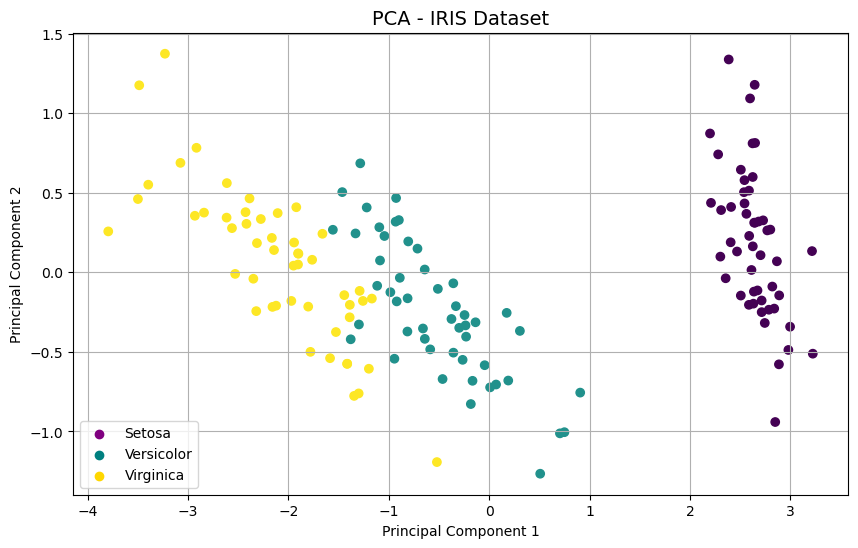

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title("PCA - IRIS Dataset", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
# Optional: Custom legend
colors = ['purple', 'teal', 'gold']
labels = ['Setosa', 'Versicolor', 'Virginica']
for i in range(3):
    plt.scatter([], [], c=colors[i], label=labels[i])
plt.legend()
plt.show()

# Extra - Bining Method

# 5,10,11,13,15,35,50,55,72,92,204,215.
Partition them into three bins by each of the following methods:
(a) equal-frequency (equal-depth) partitioning
(b) equal-width partitioning

In [31]:
data=[5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]
print('Sotred data:',data)


Sotred data: [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]
